# ライブラリ

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import math
from PIL import Image

#自作ライブラリ
import lib.image_resizer as rs
import lib.normarizer as nm

# データの下処理

### angleのロード

- center= 1689 , theta= 1.0087838730812457


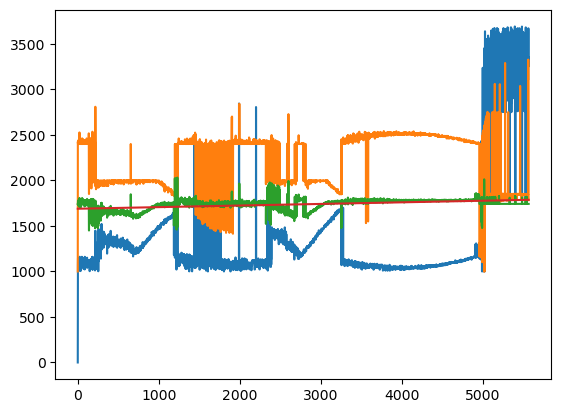

(3708, 5566)


In [5]:
def centerfinder(angle):
    #y-trim
    top_trim=1000
    bottom_trim=1000

    #平均値＆標準偏差-窓x座標
    x1=1000
    x2=1500

    #y-blank
    y1=2000
    y2=2400
    angle_graph=angle
    angle_graph[0:top_trim]=0
    angle_graph[angle_graph.shape[0]-bottom_trim:angle_graph.shape[0]]
    #angle=angle[:,x1:x2]

    blank=np.zeros_like(angle_graph)
    blank[0:y1,:]=1
    blank[y2:angle_graph.shape[0],:]=1
    angle_graph=angle_graph*blank
    max_index=angle_graph.argmax(axis=0)
    min_index=angle_graph.argmin(axis=0)

    center=(max_index+min_index)/2

    std=np.std(center[x1:x2])
    mean=np.mean(center[x1:x2])

    center[center>mean+std*3]=mean
    center[center<mean-std*3]=mean    

    func = np.poly1d(np.polyfit(range(center.shape[0]),center, 1))

    line=func(range(center.shape[0]))

    center_mean=int(round(func.c[1]))
    theta=math.degrees(math.atan(func.c[0]))
    print("- center=",center_mean,", theta=",theta)

    axis_y=round(center_mean)

    
    return theta,max_index,min_index,center,line,axis_y
    



angle=np.load("angle/angle_2410.npy")

theta,max_index,min_index,center,line,axis_y=centerfinder(angle)
plt.plot(max_index)
plt.plot(min_index)
plt.plot(center)
plt.plot(line)
plt.show()

print(angle.shape)


- center= 1689 , theta= 1.0087838730812457
- center= 1687 , theta= 1.028687766527604
- center= 1690 , theta= 0.9997273957769998
- center= 1692 , theta= 0.987751452954069
- center= 1694 , theta= 0.9688770072708217
- center= 1696 , theta= 0.9458635090002869
- center= 1699 , theta= 0.9269860188442625
- center= 1701 , theta= 0.9138531152511354
- center= 1705 , theta= 0.8774824344334919
- center= 1708 , theta= 0.844654734987168
- center= 1711 , theta= 0.8157375747742048
- center= 1714 , theta= 0.7945713016010346
- center= 1717 , theta= 0.7612876734305111
- center= 1720 , theta= 0.7316360472600364
- center= 1723 , theta= 0.7143396593976088
- center= 1725 , theta= 0.6921538269289985
- center= 1728 , theta= 0.676994503133992
- center= 1731 , theta= 0.6471497928926705
- center= 1733 , theta= 0.6405287932133658
- center= 1735 , theta= 0.623821432978557
- center= 1737 , theta= 0.6123868417759901
- center= 1739 , theta= 0.6075382363341115
- center= 1741 , theta= 0.5969923091274625
- center= 1742 ,

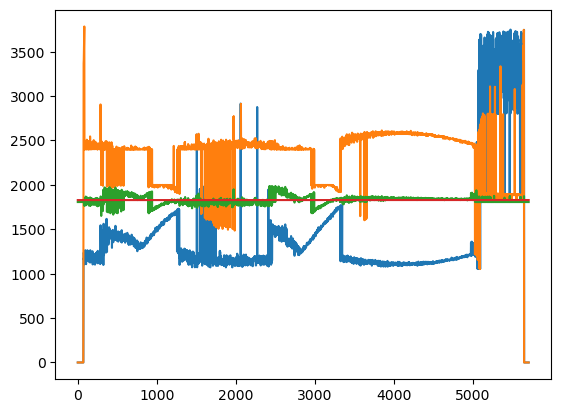

In [6]:
theta=10
e=1e-2
while abs(theta) > e:
    theta,_,_,_,_,_=centerfinder(angle)
    #print(theta)
    image=Image.fromarray(angle)
    if theta>0:
        image=image.rotate(theta/50, expand=True)
    else:
        image=image.rotate(theta/50, expand=True)
    angle=np.array(image)

theta,max_index,min_index,center,line,axis_y=centerfinder(angle)
plt.plot(max_index)
plt.plot(min_index)
plt.plot(center)
plt.plot(line)
plt.show()

In [7]:
#オブジェクトの中心が画像の中心になるようにクロップ
if axis_y < angle.shape[0]-axis_y:
    angle_crop=angle[0:axis_y*2]
    print("if")
else:
    angle_crop=angle[-axis_y*2:]
    print("else")

if


In [8]:
# #上下対象にする
# #中心より下は計算に使用しないので削除
# angle_upper=angle[0:axis_y]

# #上端が中心軸となるように上下反転
# angle_lower=angle_upper[::-1]

# angle_crop=np.block([[angle_upper], [angle_lower]])
# print(angle_crop)

(3658, 5708)


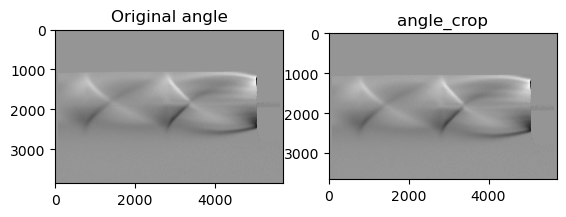

In [9]:
# 2つの画像を表示
plt.figure(figsize=(10, 5))

# 元の画像を表示
plt.subplot(1, 3, 1)
plt.imshow(angle, cmap='gray')
plt.title('Original angle')

# 処理後の画像を表示
plt.subplot(1, 3, 2)
plt.imshow(angle_crop, cmap='gray')
plt.title('angle_crop')
angle=angle_crop
print(angle.shape)

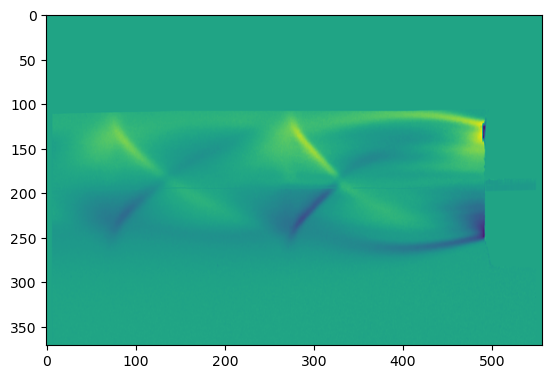

In [10]:
#画像のresize
angle=rs.resize_image(angle,(557,371))
#画像の正規化：保留
# angle,df_config["min_val"],df_config["max_val"]=nm.normalize(angle)
# angle=np.array(angle)
# print(angle.shape,df_config["min_val"],df_config["min_val"])
#angle=np.abs(angle)
plt.imshow(angle)

# シノグラムの生成

<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_36107/1393670638.py:17: SyntaxWarning: invalid escape sequence '\s'
  np.save("sinogram\sinogram_2410.npy", sinogram)


(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)
(371, 371)

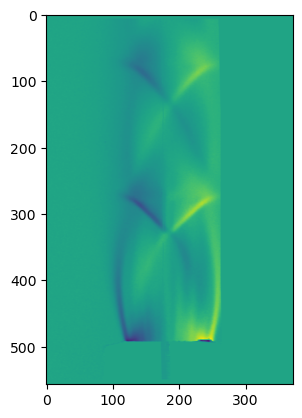

In [15]:
sinogram=[]

# 元の画像の高さを取得する
height = angle.shape[0]

angle_reshape=np.rot90(angle,-1)
min=np.min(angle_reshape)
max=np.max(angle_reshape)
plt.imshow(angle_reshape)
i=0
for d_angle in angle_reshape:
    d_sinogram= np.tile(d_angle,(371,1)).T
    print(d_sinogram.shape)
    sinogram.append(d_sinogram)
sinogram=np.array(sinogram)
print(sinogram.shape)
np.save("sinogram\sinogram_2410.npy", sinogram)